In [1]:
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt
from cyecca.lie.group_so3 import SO3Quat, SO3EulerB321, SO3Mrp, SO3Dcm

# actual attitude, expressed as quaternion
q = ca.SX.sym("q", 4)
X = SO3Quat.elem(q)

# in auto level mode
# user will input desired roll angle and desired pitch angel with
# sticks, these desired angles will not approach roll/pitch = 90 deg
# as the desired angles will be saturated
yaw_r = ca.SX.sym("yaw_r")
pitch_r = ca.SX.sym("pitch_r")
roll_r = ca.SX.sym("roll_r")
R = SO3Quat.from_Euler(SO3EulerB321.elem(ca.vertcat(yaw_r, pitch_r, roll_r)))

# the difference between vehicle attitudes will use Lie log map
# to get the angular velocity to get between the current and
# desired attitude in 1 sec, this will be used to drive the desired body
# rates for the inner rate loop

# Lie algebra
omega = (X.inverse() * R).log()  # angular velocity to get to desired att in 1 sec
# input to acro (rate loop)

f_rot = ca.Function("f", [q, yaw_r, pitch_r, roll_r], [omega.param])

f_rot([1, 0, 0, 0], 0, 0, 0)

DM([0, 0, 0])

In [2]:
(X.inverse() * R)

SO3QuatLieGroup: SX(@1=cos(yaw_r), @2=cos(pitch_r), @3=(@1*@2), @4=cos(yaw_r), @5=cos(roll_r), @6=sin(yaw_r), @7=sin(pitch_r), @8=(@6*@7), @9=sin(roll_r), @10=((@4*@5)+(@8*@9)), @11=cos(pitch_r), @12=cos(roll_r), @13=(@11*@12), @14=(0<((@3+@10)+@13)), @15=0.5, @16=1, @17=(@15*sqrt((((@16+@3)+@10)+@13))), @18=(!@14), @19=((@10<@3)&&(@13<@3)), @20=(@11*@9), @21=sin(roll_r), @22=((@8*@12)-(@4*@21)), @23=4, @24=(@15*sqrt((((@16+@3)-@10)-@13))), @25=(!@19), @26=(@13<@10), @27=sin(yaw_r), @28=(@1*@7), @29=((@27*@21)+(@28*@12)), @30=sin(pitch_r), @31=(@15*sqrt((((@16-@3)+@10)-@13))), @32=(!@26), @33=(@6*@2), @34=((@28*@9)-(@27*@5)), @35=(@15*sqrt((((@16-@3)-@10)+@13))), @36=((@14?@17:0)+(@18?((@19?((@20-@22)/(@23*@24)):0)+(@25?((@26?((@29+@30)/(@23*@31)):0)+(@32?((@33-@34)/(@23*@35)):0)):0)):0)), @37=((@14?((@20-@22)/(@23*@17)):0)+(@18?((@19?@24:0)+(@25?((@26?((@34+@33)/(@23*@31)):0)+(@32?((@29-@30)/(@23*@35)):0)):0)):0)), @38=((@14?((@29+@30)/(@23*@17)):0)+(@18?((@19?((@34+@33)/(@23*@24)):0)

In [3]:
X.inverse

<bound method LieGroupElement.inverse of SO3QuatLieGroup: SX([q_0, q_1, q_2, q_3])>

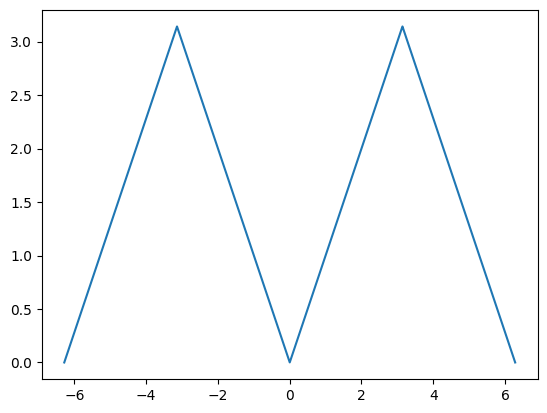

In [6]:
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt
from cyecca.lie.group_so3 import SO3Quat, SO3EulerB321, SO3Mrp, SO3Dcm

yaw_r = ca.SX.sym("yaw_r")
# Group = SO3Dcm
Group = SO3Quat
# Group = SO3Mrp

X = Group.from_Euler(SO3EulerB321.elem(ca.vertcat(0, 0, 0)))
R = Group.from_Euler(SO3EulerB321.elem(ca.vertcat(yaw_r, 0, 0)))
omega_norm = ca.norm_2((X.inverse() * R).log().param)
f_omega_norm = ca.Function("f", [yaw_r], [omega_norm])

yaw_r = np.linspace(-2 * ca.pi, 2 * ca.pi, 10000)

plt.plot(yaw_r, f_omega_norm(yaw_r))

In [36]:
np.pi * 2 / 3

2.0943951023931953

In [13]:
omega = (X.inverse() * R).log()
omega

SO3LieAlgebra: SX(@1=0, @2=cos(yaw_r), @3=cos(yaw_r), @4=1, @5=(@1<((@2+@3)+@4)), @6=(!@5), @7=(@1&&(@4<@2)), @8=(!@7), @9=(@4<@3), @10=nan, @11=sin(yaw_r), @12=sin(yaw_r), @13=4, @14=0.5, @15=(@14*sqrt((((@4+@2)+@3)+@4))), @16=(!@9), @17=(@14*sqrt((((@4-@2)-@3)+@4))), @18=((@5?((@11+@12)/(@13*@15)):0)+(@6?((@7?@10:0)+(@8?((@9?@10:0)+(@16?@17:0)):0)):0)), @19=sqrt(((@6?((@8?(@9?(@6?(@8?(@9?@10:0):0):0):0):0)+(@7?(@6?(@7?@10:0):0):0)):0)+sq(@18))), @20=(1e-10<fabs(@19)), @21=((@5?@15:0)+(@6?((@7?@10:0)+(@8?((@9?@10:0)+(@16?((@11+@12)/(@13*@17)):0)):0)):0)), @22=atan2(@19,@21), @23=(!@20), @24=sign(@21), @25=2, [((@20?((@6?(@8?(@9?(@10*@22):0):0):0)/@19):0)+(@23?(@6?(@8?(@9?(@10*@24):0):0):0):0)), ((@20?((@6?(@7?(@10*@22):0):0)/@19):0)+(@23?(@6?(@7?(@10*@24):0):0):0)), ((@20?(((@25*@18)*@22)/@19):0)+(@23?((@25*@18)*@24):0))])

In [40]:
X = SO3Mrp.from_Euler(SO3EulerB321.elem(ca.vertcat(1, 2, 3)))

SO3MrpLieGroup: SX([0.309505, 0.216318, -0.500216])

In [ ]:
SO3